# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [9]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
dataset_dir = os.path.join('..')

# Cek isi folder dataset
data_files = os.listdir(dataset_dir)
print("Files in dataset:", data_files)

# Load dataset
file_path = os.path.join(dataset_dir, 'Heart_Disease_Prediction.csv')
df = pd.read_csv(file_path)

print("\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Files in dataset: ['.config', 'Heart_Disease_Prediction.csv', 'sample_data']

Dataset loaded successfully!
Shape: (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtype

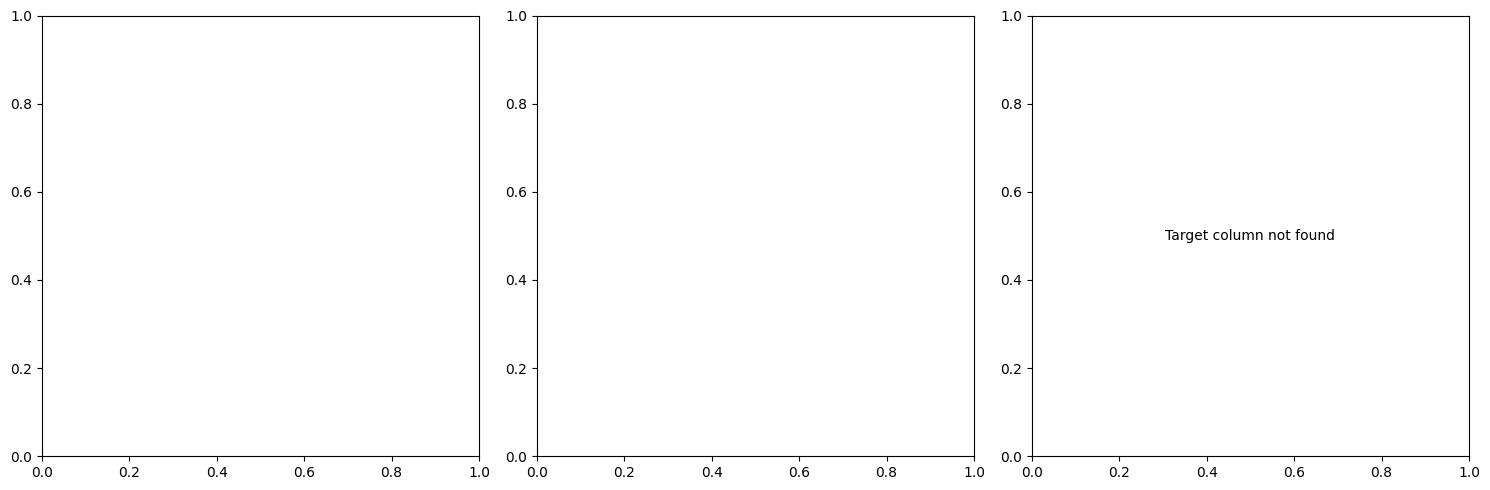


=== Korelasi dengan Target ===
Target column tidak ditemukan dalam kolom numerik


In [12]:
# Informasi dasar dataset
print("=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe())

print("\n=== Cek Missing Values ===")
print(df.isnull().sum())

print("\n=== Cek Duplikasi ===")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Memastikan hanya kolom numerik untuk visualisasi
numeric_df = df.select_dtypes(include=[np.number])

# Visualisasi distribusi target
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
if 'target' in df.columns:
    df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Distribusi Target (Heart Disease)')
    plt.xlabel('Target (0=No, 1=Yes)')
    plt.ylabel('Count')

# Distribusi umur
plt.subplot(1, 3, 2)
if 'age' in df.columns:
    plt.hist(df['age'], bins=20, color='lightgreen', edgecolor='black')
    plt.title('Distribusi Umur')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

# Correlation heatmap (top features)
plt.subplot(1, 3, 3)
if len(numeric_df.columns) > 0:
    correlation = numeric_df.corr()
    if 'target' in correlation.columns:
        top_corr = correlation[['target']].sort_values(by='target', ascending=False).head(10)
        sns.heatmap(top_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title('Top 10 Correlation with Target')
    else:
        plt.text(0.5, 0.5, 'Target column not found', ha='center', va='center')

plt.tight_layout()
plt.show()

# Menampilkan korelasi dengan target
print("\n=== Korelasi dengan Target ===")
if 'target' in numeric_df.columns:
    print(numeric_df.corr()['target'].sort_values(ascending=False))
else:
    print("Target column tidak ditemukan dalam kolom numerik")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# 1. Cek dan Handle Missing Values
print("=== Handling Missing Values ===")
print(f"Missing values sebelum: {df.isnull().sum().sum()}")
df = df.dropna()  # Menghapus baris dengan missing values
print(f"Missing values setelah: {df.isnull().sum().sum()}")

# 2. Hapus Duplikasi
print(f"\n=== Handling Duplicates ===")
print(f"Duplikasi sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplikasi setelah: {df.duplicated().sum()}")
print(f"Shape setelah cleaning: {df.shape}")

# 3. Encoding Kolom Target (Heart Disease)
print("\n=== Encoding Target Variable ===")
print(f"Nilai unik Heart Disease sebelum encoding: {df['Heart Disease'].unique()}")

# Mapping Heart Disease ke nilai numerik (Presence = 1, Absence = 0)
if df['Heart Disease'].dtype == 'object':
    df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
    print(f"Nilai unik Heart Disease setelah encoding: {df['Heart Disease'].unique()}")
    print(f"Distribusi Heart Disease:\n{df['Heart Disease'].value_counts()}")

# 4. Deteksi Outlier (menggunakan IQR method pada kolom numerik)
print("\n=== Deteksi Outlier (IQR Method) ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Heart Disease' in numeric_cols:
    numeric_cols.remove('Heart Disease')  # Exclude target column

outliers_count = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outliers_count[col] = len(outliers)

print(pd.Series(outliers_count).sort_values(ascending=False).head(10))

# 5. Pisahkan Fitur dan Target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

print(f"\n=== Data Split ===")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# 6. Normalisasi/Standarisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n=== Standarisasi Selesai ===")
print(X_scaled.head())

# 7. Split Data untuk Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n=== Train-Test Split ===")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Testing target distribution:\n{y_test.value_counts()}")

=== Handling Missing Values ===
Missing values sebelum: 0
Missing values setelah: 0

=== Handling Duplicates ===
Duplikasi sebelum: 0
Duplikasi setelah: 0
Shape setelah cleaning: (270, 14)

=== Encoding Target Variable ===
Nilai unik Heart Disease sebelum encoding: ['Presence' 'Absence']
Nilai unik Heart Disease setelah encoding: [1 0]
Distribusi Heart Disease:
Heart Disease
0    150
1    120
Name: count, dtype: int64

=== Deteksi Outlier (IQR Method) ===
FBS over 120               40
Chest pain type            20
Number of vessels fluro    19
BP                          9
Cholesterol                 5
ST depression               4
Max HR                      1
Sex                         0
Age                         0
Exercise angina             0
dtype: int64

=== Data Split ===
Features shape: (270, 13)
Target shape: (270,)
Target distribution:
Heart Disease
0    150
1    120
Name: count, dtype: int64

=== Standarisasi Selesai ===
        Age       Sex  Chest pain type        BP  C